## 분산분석

### 일원분산분석

In [1]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import pandas as pd # pandas package
import numpy as np # numpy package
from scipy import stats # Scipy Package
import math

#시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # Windows OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [2]:
# 데이터셋
a = [66, 74, 82, 75, 73, 97, 87, 78]
b = [72, 51, 59, 62, 74, 64, 78, 63]
c = [61, 60, 57, 60, 81, 77, 70, 71]
d = [63, 61, 76, 84, 58, 65, 69, 80]
print("a 평균: ", np.mean(a))
print("b 평균: ", np.mean(b))
print("c 평균: ", np.mean(c))
print("d 평균: ", np.mean(d))

a 평균:  79.0
b 평균:  65.375
c 평균:  67.125
d 평균:  69.5


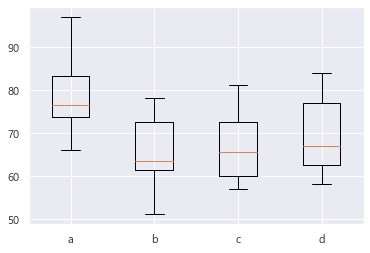

In [3]:
# 이상값 확인
plot_data = [a, b, c, d]
plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
plt.grid(True)
plt.show()

In [4]:
# 데이터프레임 변환
check = ['a', 'b', 'c', 'd']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수':a+b+c+d, '교육기관':check})
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [5]:
## 정규성 검정 : 자료의 모집단 분포는 정규분포를 따름
from scipy.stats import shapiro

print('정규성을 검정')
normal_a = shapiro(a)
normal_b = shapiro(b)
normal_c = shapiro(c)
normal_d = shapiro(d)

print(normal_a)
print(normal_b)
print(normal_c)
print(normal_d)

print(stats.ks_2samp(a, b), stats.ks_2samp(a, c), stats.ks_2samp(a, d),
     stats.ks_2samp(b, c), stats.ks_2samp(b, d),
     stats.ks_2samp(c, d), sep = "\n")

## 등분산성 검정 : 모든 집단의 모분산은 동일함
print('등분산성 검정')
#levene 등분산성 검정
from scipy.stats import levene
print(levene(a, b, c, d))

# bartlett 등분산성 검정
from scipy.stats import bartlett
print(bartlett(a, b, c, d))

# 결과 : p-value > 0.05, 등분산성 만족

정규성을 검정
ShapiroResult(statistic=0.9516036510467529, pvalue=0.7273865938186646)
ShapiroResult(statistic=0.9632648825645447, pvalue=0.8405646681785583)
ShapiroResult(statistic=0.8988886475563049, pvalue=0.2823662757873535)
ShapiroResult(statistic=0.93294757604599, pvalue=0.5432827472686768)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
등분산성 검정
LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
BartlettResult(statistic=0.07373983712569482, pvalue=0.9947906337756077)


In [24]:
# F통계량을 이용한 가설 검정
f_statistic, pval = stats.f_oneway(a, b, c, d)

print('F = {0:.1f}, p = {1:.3f}'.format(f_statistic, pval))

if pval < 0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else:
    print("귀무가설 채택, 4개의 교육훈련 기법간이 차이가 없다.")

F = 3.5, p = 0.029
귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


### Statsmodel을 이용한 가설 검정

In [7]:
# Statsmodel을 사용한 일원분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols('점수 ~ C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

# data.shape(32, 2)
# SSA k - 1 = 4 - 1 = 4????
# SSE N-k = 32-4 = 28
# SST N-1 = 32-1 = 31
# MSA / MSW = 295.083333 / 84.740171 = 3.482176

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [8]:
pval = anova_lm_result['PR(>F)'][0]

if pval < 0.05:
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else :
    print("귀무가설 채택, 4개의 교육훈련 기법간이 차이가 없다.")

귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


In [9]:
## 사후 분석 : ANOVA 검증 결과 유의미하다는 결론을 얻었을 떄,
## 구체적으로 어던 수준(들)에서 평균 차이가 나는지를 검증
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha = 0.05)
HSD.summary()

# a, b 차이, a, c 차이만 유의함

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0692,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9809,-10.8169,14.3169,False
b,d,4.125,0.8068,-8.4419,16.6919,False
c,d,2.375,0.9546,-10.1919,14.9419,False


### 이원분산분석

In [18]:
# 종속변수: 강도, 독립변수 : 판유리/ 온도

data = pd.DataFrame({'판유리' :  ['유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', '유리',
                             '유리3', '유리1', '유리', '유리1', '유리2', '유리2', '유리2', '유리2',
                             '유리3', '유리3', '유리1', '유리1', '유리1', '유리2', '유리2', '유리2', 
                             '유리3', '유리3', '유리3'],
                   '온도' : [100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125,
                          125, 125, 125, 125, 150, 150, 150, 150, 150, 150, 150, 150, 150],
                   '강도' : [580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
                           1035, 1000, 1045, 1053, 1066, 1392, 1380, 1386, 1328, 1312, 1299, 867,
                          904, 889]})

In [19]:
data.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [20]:
data.groupby(['판유리', '온도']).agg(len)
# 판유리 온도 요인으로 구분한 각 집단별 표본 수는 모두 3으로 동일

강도
판유리 온도     
유리  100   1
    125   1
유리1 100   3
    125   2
    150   3
유리2 100   3
    125   4
    150   3
유리3 100   2
    125   2
    150   3

In [21]:
# 이원분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', data).fit()
anova_result = pd.DataFrame(anova_lm(model))

anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),3.0,1.325932e+05,4.419772e+04,108.630059,7.519463e-11
C(온도),2.0,2.016331e+06,1.008166e+06,2477.889953,1.150442e-20
C(판유리):C(온도),6.0,2.630886e+05,4.384810e+04,107.770740,4.979543e-12
Residual,16.0,6.509833e+03,4.068646e+02,NaN,NaN


In [23]:
## 사후 분석
data['온도'] = data['온도'].astype('str')
data['combi'] = data.판유리 + " / " + data.온도
print(pairwise_tukeyhsd(data['강도'], data['combi']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
 유리 / 100  유리 / 125     512.0    0.0  405.9839  618.0161   True
 유리 / 100 유리1 / 100   -2.3333    1.0  -88.8951   84.2284  False
 유리 / 100 유리1 / 125     512.5    0.0  420.6874  604.3126   True
 유리 / 100 유리1 / 150     811.0    0.0  724.4382  897.5618   True
 유리 / 100 유리2 / 100     -22.0 0.9951 -108.5618   64.5618  False
 유리 / 100 유리2 / 125     462.5    0.0  378.6869  546.3131   True
 유리 / 100 유리2 / 150     738.0    0.0  651.4382  824.5618   True
 유리 / 100 유리3 / 100      -2.5    1.0  -94.3126   89.3126  False
 유리 / 100 유리3 / 125     484.5    0.0  392.6874  576.3126   True
 유리 / 100 유리3 / 150  311.6667    0.0  225.1049  398.2284   True
 유리 / 125 유리1 / 100 -514.3333    0.0 -600.8951 -427.7716   True
 유리 / 125 유리1 / 125       0.5    1.0  -91.3126   92.3126  False
 유리 / 125 유리1 / 150     299.0    0.0  21